In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import ast
from tqdm import tqdm
import time
from collections import Counter
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
data=pd.read_csv('model data/final.csv')
data.shape

(142776, 14)

In [3]:
data.head()

,latitude,longitude,nkill,days_passed,DIS_LAKE,DIS_MAJOR_RIVER,DIS_OCEAN,PRECI_AVG,TEMP_AVG,population,ethnic_groups,topography_elevation,nightlight_intensity,happy_index
0,18.5,-70.0,1,17834,1415040.0,1285293.0,33082.41,1703.198276,26.640805,2180.63,99999,62.00,59.82,4.885
1,34.8,37.3,1,1406,73722.0,1133031.0,140738.70,198.627586,17.571624,14.11,1,821.48,0.94,3.006
2,14.5,44.4,1,1407,826500.5,1737351.0,196373.80,347.809479,20.158693,214.15,3,2445.19,10.57,4.077
3,36.5,40.7,1,1407,167311.2,943071.2,432522.10,542.012062,16.618319,178.64,3,311.09,10.94,3.006
4,33.6,36.3,1,1406,199295.5,1169763.0,56242.69,516.005172,14.889152,74.82,1,1157.07,31.62,3.006


In [4]:
data['nkill'].value_counts()

1    71422
0    71354
Name: nkill, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142776 entries, 0 to 142775
Data columns (total 14 columns):
latitude                142776 non-null float64
longitude               142776 non-null float64
nkill                   142776 non-null int64
days_passed             142776 non-null int64
DIS_LAKE                142776 non-null float64
DIS_MAJOR_RIVER         142776 non-null float64
DIS_OCEAN               142776 non-null float64
PRECI_AVG               142776 non-null float64
TEMP_AVG                142776 non-null float64
population              142776 non-null float64
ethnic_groups           142776 non-null int64
topography_elevation    142776 non-null float64
nightlight_intensity    142776 non-null float64
happy_index             142776 non-null float64
dtypes: float64(11), int64(3)
memory usage: 15.3 MB


In [6]:
def plot_map(lat,lon):
    fig = plt.figure(figsize=(20,20))
    # determine range to print based on min, max lat and lon of the data
    margin = 2 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin

    # create map using BASEMAP
    m = Basemap(llcrnrlon=lon_min,
                llcrnrlat=lat_min,
                urcrnrlon=lon_max,
                urcrnrlat=lat_max,
                lat_0=(lat_max - lat_min)/2,
                lon_0=(lon_max-lon_min)/2,
                projection='merc',
                resolution = 'h',
                area_thresh=10000.,
                )
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    m.drawmapboundary(fill_color='#46bcec')
    m.fillcontinents(color = 'white',lake_color='#46bcec')
    # convert lat and lon to map projection coordinates
    lons, lats = m(lon, lat)
    # plot points as red dots
    m.scatter(lons, lats, marker = 'o', color='r', zorder=4)
    plt.show()

In [7]:
data['population']=data['population'].astype('float64')

### checking where topography_elevation is 99999

In [8]:
tt=data[data['topography_elevation']==99999]
tt.shape

(4779, 14)

In [9]:
tt.head()

,latitude,longitude,nkill,days_passed,DIS_LAKE,DIS_MAJOR_RIVER,DIS_OCEAN,PRECI_AVG,TEMP_AVG,population,ethnic_groups,topography_elevation,nightlight_intensity,happy_index
8,35.9,10.6,1,1404,287681.5,1262467.0,21061.6,453.281600,18.368390,99999.0,99999,99999.0,44.96,4.739
16,1.7,44.8,1,1407,881817.6,3057728.0,43757.3,478.150579,27.514177,99999.0,99999,99999.0,0.94,99999.000
81,32.8,22.6,1,1401,723646.4,1279167.0,42258.6,245.354014,18.483908,99999.0,99999,99999.0,24.94,5.754
116,32.8,22.6,1,1406,723646.4,1279167.0,42258.6,245.354014,18.483908,99999.0,99999,99999.0,24.94,5.754
130,46.4,30.8,1,1404,137172.3,213671.4,3918.5,379.844828,10.028448,99999.0,99999,99999.0,18.59,4.681


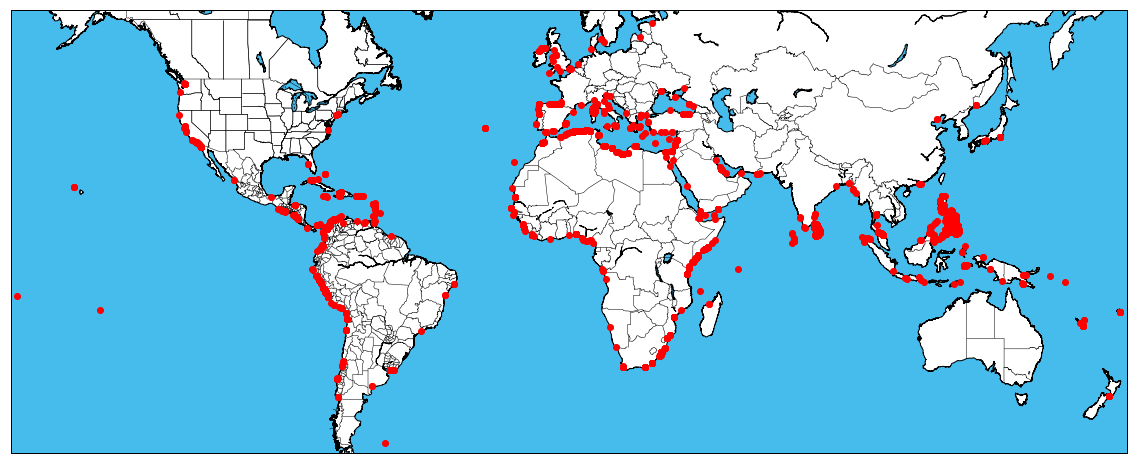

In [10]:
lat=tt['latitude'].values
lon=tt['longitude'].values

plot_map(lat,lon)

In [11]:
# we see that all topography_elevation are 99999 where there are attacks in ocean
# so make there ethnic groups and population to be 0 when topography_elevation is 0 or 99999
ind=list(data[data['topography_elevation']==0].index)
for i in ind:
    if int(data.at[i,'population'])==99999:
         data.at[i,'population']=0
    if int(data.at[i,'ethnic_groups'])==99999:
         data.at[i,'ethnic_groups']=0
            

ind=list(data[data['topography_elevation']==99999].index)
for i in ind:
    data.at[i,'topography_elevation']=0
    if int(data.at[i,'population'])==99999:
         data.at[i,'population']=0
    if int(data.at[i,'ethnic_groups'])==99999:
         data.at[i,'ethnic_groups']=0

### checking where ethnic_groups and poplation are 99999

In [12]:
tt=data[data['population']==99999]
tt.shape

(5120, 14)

In [13]:
tt.head()

,latitude,longitude,nkill,days_passed,DIS_LAKE,DIS_MAJOR_RIVER,DIS_OCEAN,PRECI_AVG,TEMP_AVG,population,ethnic_groups,topography_elevation,nightlight_intensity,happy_index
134,14.3,122.5,1,1400,130072.5,1400308.0,16782.23,2315.018966,27.057328,99999.0,1,25.40,0.75,5.073
161,25.3,63.5,1,1348,270170.3,1542649.0,33804.14,103.967816,25.939751,99999.0,99999,14.28,3.91,5.194
202,7.9,81.5,1,1353,1637823.0,1943106.0,16319.98,1589.858621,28.529885,99999.0,3,4.86,11.59,4.271
229,35.8,10.6,1,1350,287681.5,1262467.0,21061.60,453.281600,18.368390,99999.0,99999,12.00,59.51,4.739
351,14.0,121.9,1,1388,130072.5,1400308.0,16782.23,2315.018966,27.057328,99999.0,1,14.28,2.96,5.073


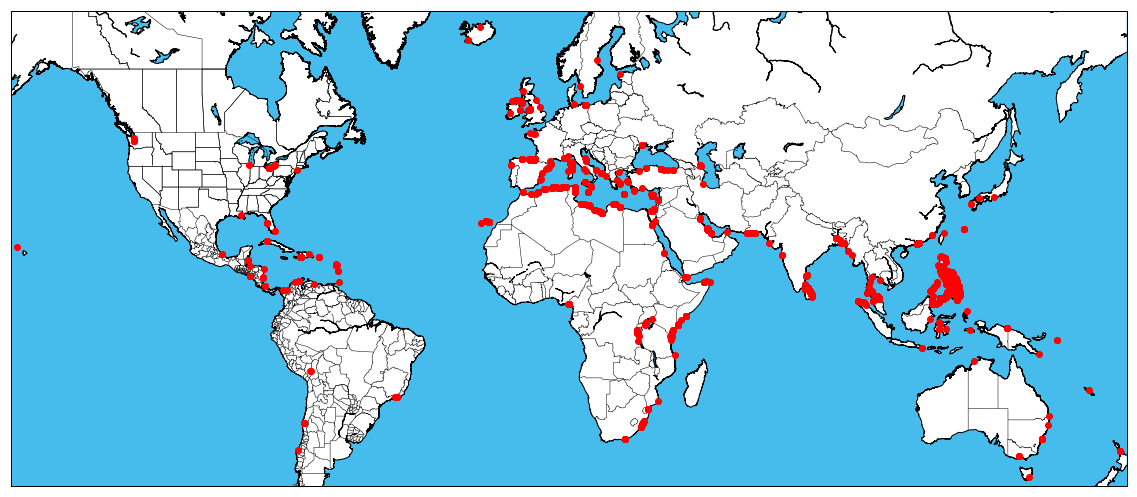

In [14]:
lat=tt['latitude'].values
lon=tt['longitude'].values

plot_map(lat,lon)

### removing all rows where value is 99999

In [15]:
df = data.replace(99999, pd.np.nan)

In [16]:
data=df.dropna()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121037 entries, 1 to 142775
Data columns (total 14 columns):
latitude                121037 non-null float64
longitude               121037 non-null float64
nkill                   121037 non-null int64
days_passed             121037 non-null int64
DIS_LAKE                121037 non-null float64
DIS_MAJOR_RIVER         121037 non-null float64
DIS_OCEAN               121037 non-null float64
PRECI_AVG               121037 non-null float64
TEMP_AVG                121037 non-null float64
population              121037 non-null float64
ethnic_groups           121037 non-null float64
topography_elevation    121037 non-null float64
nightlight_intensity    121037 non-null float64
happy_index             121037 non-null float64
dtypes: float64(12), int64(2)
memory usage: 13.9 MB


### plotting all the available data

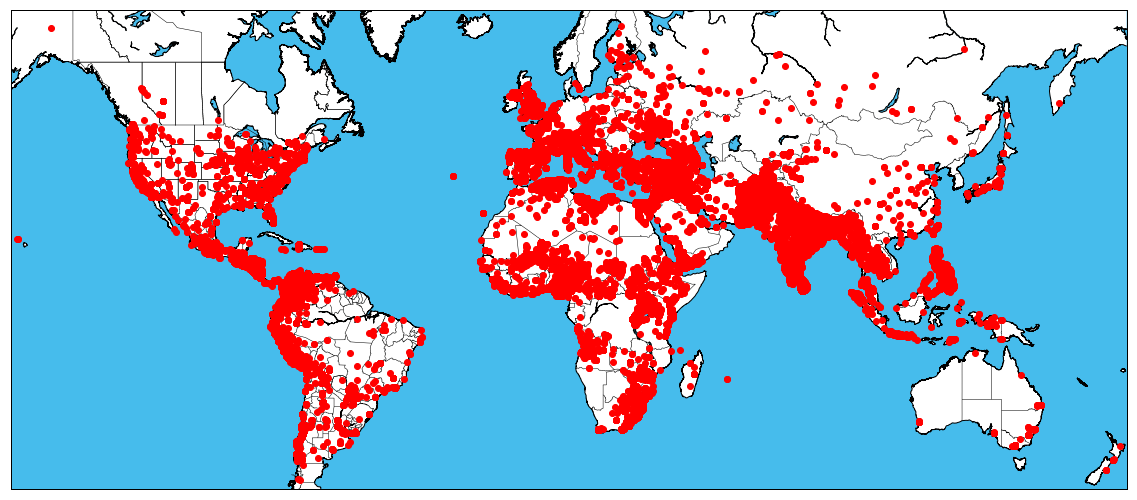

In [18]:
lat=data['latitude'].values
lon=data['longitude'].values

plot_map(lat,lon)

D:\programs\anaconda\envs\tf-gpu\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


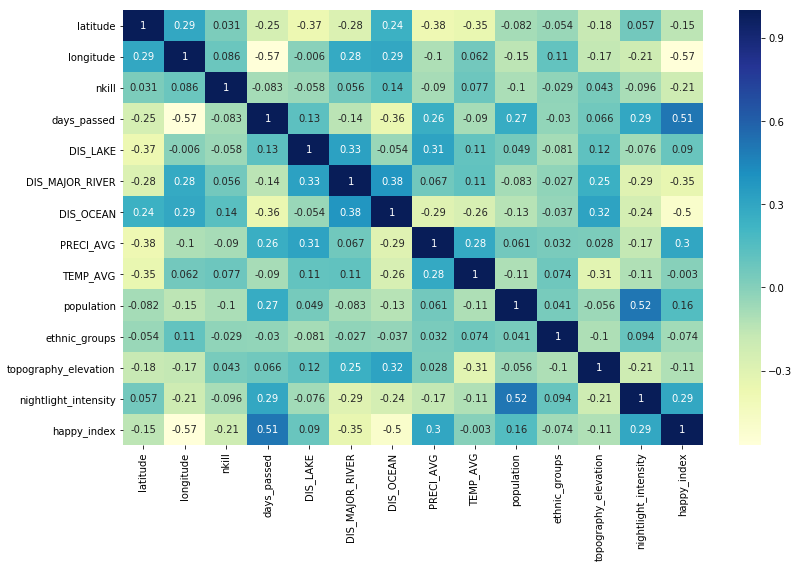

In [19]:
fig = plt.figure(figsize=(13,8))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
fig.show()

In [20]:
# shuffling the dataset
data = data.sample(frac=1).reset_index(drop=True)

In [21]:
X=data.drop(columns=['nkill'])
y=data['nkill']

In [22]:
scaler = StandardScaler()
print(scaler.fit(X))

D:\programs\anaconda\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)


In [23]:
X=scaler.transform(X)

D:\programs\anaconda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [24]:
from sklearn import model_selection
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [26]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=50, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=50, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [29]:
scores = cross_val_score(bag_clf, X_train, y_train, cv=5, scoring='accuracy')
print(scores.mean())

0.6300385106196015


### voting classifier

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [32]:
logClf = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1)
rfClf = RandomForestClassifier(n_estimators=50, random_state=1)
gaussClf = GaussianNB()

In [33]:
eclf = VotingClassifier(estimators=[('lr', logClf), ('rf', rfClf), ('gnb', gaussClf)], voting='hard')

In [34]:
eclf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=1, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Ran...andom_state=1, verbose=0, warm_start=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [35]:
for clf, label in zip([logClf, rfClf, gaussClf, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.60 (+/- 0.00) [Logistic Regression]
Accuracy: 0.65 (+/- 0.00) [Random Forest]
Accuracy: 0.60 (+/- 0.00) [naive Bayes]
Accuracy: 0.63 (+/- 0.00) [Ensemble]
